# Quick Start

In [1]:
import sys
sys.path.append('../../../')
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import sloth

Load data and fit a simple linear model.

In [2]:
X,Y = load_diabetes(as_frame=True, return_X_y =True)

In [3]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X, Y);

Now we setup the ValidationTask object that is the input to sloth's algorithms. 

In [4]:
# We describe all features via the repective description classes.
# The description may contain usefull informatiosn that are used in subsequent algorithm. See the documentation for a list
# of parameters.
input_features = [ sloth.OrdinalFeatureDescription(name=name) for name in X.columns if name != 'sex'] # all feature ordinal except sex
input_features.append(sloth.DiscreteOrdinalFeatureDescription(name='sex'))

output_feature = sloth.OrdinalFeatureDescription(name='disease progression', column=0)

In [5]:
validation_task = sloth.ValidationTask(input_features = input_features, output_features=output_feature, 
                                       x=X, predict=lin_regr.predict, problemtype='regression')

We use sloth's ICE class to generate an individual conditional expectation plot.

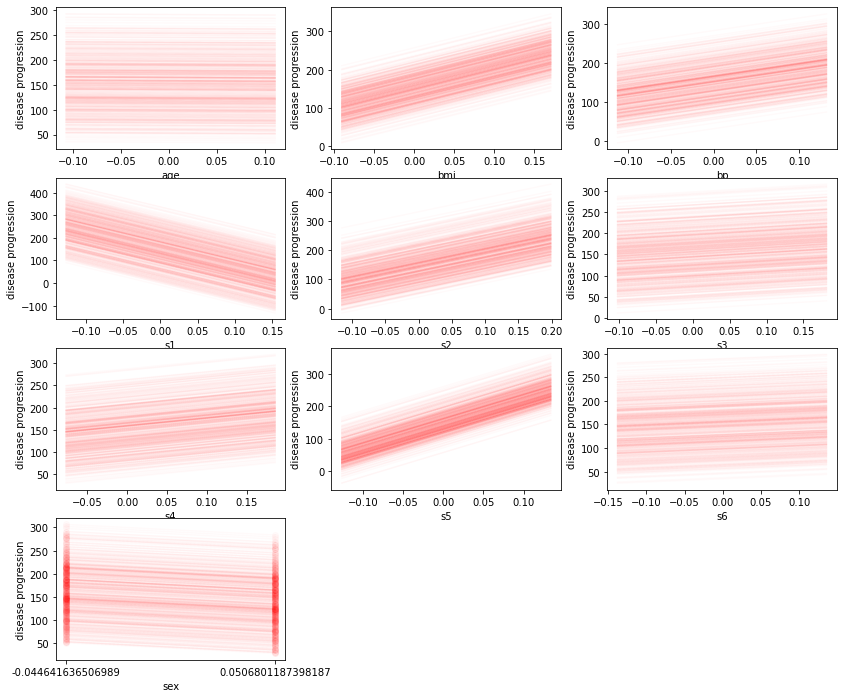

In [6]:
plot_param = sloth.PlotParameter(max_subplot_columns=3)
plt.figure(figsize=(14,12))
ice = sloth.ICE(validation_task)
ice.plot(plot_param=plot_param)